<b>Методы одномерного поиска.</b>

<i>Дана функция: f(x) = cos(x)</i>

<b>Аналитическое решение</b>

При минимальном значении (x = 0), cos(0) = 1

<b>Импорт библиотек, задание списков, чтобы в будущем на их основе создать таблицу. Создание функции для добавления данных в списки. Запрос ввода точности.</b>

In [68]:
import numpy as np
import time
import pandas as pd
import math
import matplotlib.pyplot as plt

tolerance = float(input("Введите точность: "))

def f(x):
    return np.cos(x)

def derivative(x):
    return np.cos(x)

minf_list = []
minx_list = []
iter_list = []
exec_list = []
final_interval_list=[]

def add_values(minf, minx, iters, exec_time, final_interval):
    minf_list.append(minf)
    minx_list.append(minx)
    iter_list.append(iters)
    exec_list.append(exec_time)
    final_interval_list.append(final_interval)

<b>Метод половинного деления</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		50.000000	100.000000	50.000000		N/A
2		75.000000	100.000000	25.000000		0.5
3		87.500000	100.000000	12.500000		0.5
4		93.750000	100.000000	6.250000		0.5
5		96.875000	100.000000	3.125000		0.5
6		96.875000	98.437500	1.562500		0.5
7		97.656250	98.437500	0.781250		0.5
8		97.656250	98.046875	0.390625		0.5
9		97.656250	97.851562	0.195312		0.5
10		97.656250	97.753906	0.097656		0.5
11		97.656250	97.705078	0.048828		0.5
12		97.656250	97.680664	0.024414		0.5
13		97.656250	97.668457	0.012207		0.5
14		97.656250	97.662354	0.006104		0.5
15		97.656250	97.659302	0.003052		0.5
16		97.656250	97.657776	0.001526		0.5
17		97.656250	97.657013	0.000763		0.5
Минимальное значение функции: -0.964599002586723,
 Значение x: 97.65625,
 Число итераций: 17,
 Время выполнения: 0.001505 секунд.


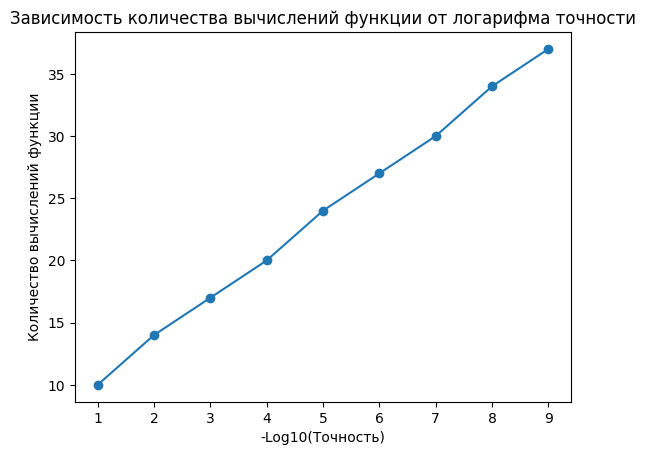

In [69]:
def half_interval(start, end, tol):
    iters = 0
    data = [] 
    prev_interval_length = float('inf')  
    while end - start > tol:
        iters += 1
        mid = (start + end) / 2
        if f(mid) > f(start):
            end = mid
        else:
            start = mid

        final_interval = end - start
        ratio = final_interval / prev_interval_length if iters > 1 else None
        
        data.append([iters, start, end, final_interval, ratio])
    
        prev_interval_length = final_interval

    return start, f(start), iters, data, final_interval

start_time = time.time()
result = half_interval(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time
minx, minf, iters, table_data, final_interval = result
add_values(minf, minx, iters, exec_time, final_interval)

if isinstance(result, tuple):
    
    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list = [half_interval(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")

<b>Метод золотого сечения</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
17		38.200000	100.000000	61.800000		N/A
17		38.200000	76.392400	38.192400		0.38187702265372186
17		38.200000	61.802903	23.602903		0.3818770226537214
17		38.200000	52.786594	14.586594		0.38187702265372153
17		43.772079	52.786594	9.014515		2.618644067796608
17		43.772079	49.343049	5.570970		0.38187702265372137
17		45.900190	49.343049	3.442860		2.618644067796606
17		45.900190	48.027877	2.127687		0.38187702265372225
17		46.712966	48.027877	1.314911		2.618644067796611
17		46.712966	47.525581	0.812615		0.3818770226537262
17		47.023385	47.525581	0.502196		2.618644067796672
17		47.023385	47.333742	0.310357		0.38187702265373563
17		47.023385	47.215186	0.191801		0.38187702265373247
17		47.096653	47.215186	0.118533		2.6186440677964304
17		47.096653	47.169906	0.073253		0.3818770226536931
17		47.096653	47.141923	0.045271		0.38187702265382023
17		47.113946	47.141923	0.027977		2.618644067797174
17		47.113946	47.131236	0.017290		

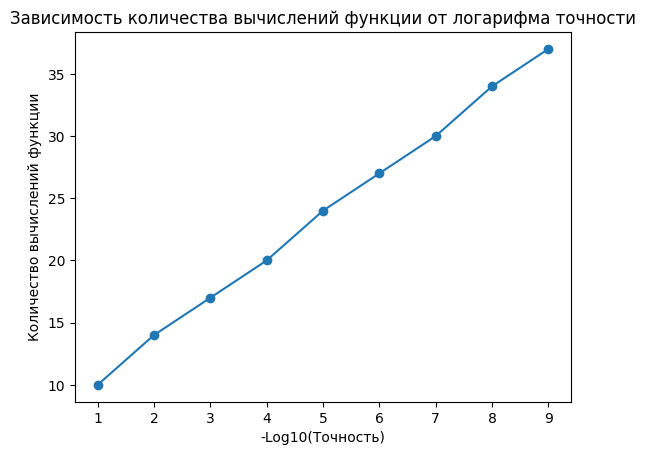

In [70]:
def golden_section(start, end, tol):
    iterations = 0
    data = []
    while end - start > tol:
        iterations += 1
        mid1 = start + (end - start) * 0.382
        mid2 = start + (end - start) * 0.618
        if f(mid1) > f(mid2):
            start = mid1
        else:
            end = mid2
            
        final_interval = end - start
        ratio = (end - mid1) / (mid2 - start) if iterations > 1 else None
        
        data.append([iters, start, end, final_interval, ratio])
    
        prev_interval_length = final_interval

    return start, f(start), iters, data, final_interval

start_time = time.time()
result = golden_section(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time
minx, minf, iters, table_data, final_interval = result
add_values(minf, minx, iters, exec_time, final_interval)

if isinstance(result, tuple):
    
    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list = [half_interval(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"Минимальное значение функции: {minf},\n Значение x: {minx},\n "f"Число итераций: {iters},\n Время выполнения: {exec_time:.6f} секунд.")



<b>Метод Фибоначчи</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		38.196601	100.000000	61.803399		N/A
2		38.196601	76.393202	38.196601		1.6180339887498951
3		38.196601	61.803399	23.606798		1.618033988749895
4		38.196601	52.786405	14.589803		1.6180339887498945
5		43.769410	52.786405	9.016994		1.618033988749894
6		43.769410	49.342219	5.572809		1.6180339887498936
7		45.898034	49.342219	3.444185		1.618033988749893
8		45.898034	48.026657	2.128624		1.6180339887498913
9		46.711096	48.026657	1.315562		1.61803398874989
10		46.711096	47.524158	0.813062		1.6180339887498845
11		47.021658	47.524158	0.502500		1.618033988749885
12		47.021658	47.332220	0.310562		1.6180339887499209
13		47.021658	47.213595	0.191938		1.6180339887499235
14		47.094971	47.213595	0.118624		1.6180339887499764
15		47.094971	47.168285	0.073314		1.6180339887498385
16		47.094971	47.140282	0.045310		1.6180339887500426
17		47.112278	47.140282	0.028003		1.6180339887495083
18		47.112278	47.129585	0.017307		1.618033988750242

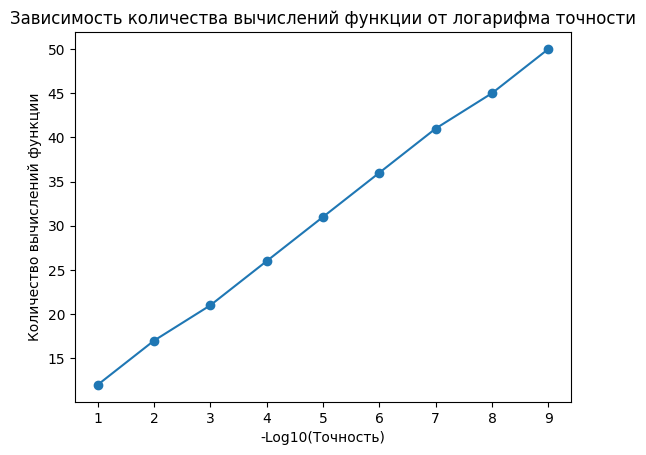

In [71]:
def fibonacci_method(a, b, tol):
    fib_sequence = [1, 1]

    while fib_sequence[-1] < (b - a) / tol:
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

    rho = 0.5 * (1.0 + math.sqrt(5.0))
    c = b - (b - a) / rho
    d = a + (b - a) / rho
    fc = f(c)
    fd = f(d)
    iterations = 0
    data = []

    while abs(c - d) > tol:
        iterations += 1

        if fc < fd:
            b = d
            d = c
            c = b - (b - a) / rho
            fd = fc
            fc = f(c)
        else:
            a = c
            c = d
            d = a + (b - a) / rho
            fc = fd
            fd = f(d)

        xmin = 0.5 * (a + b)
        ymin = f(xmin)
        interval_length = b - a
        ratio = interval_length / (b - c) if iterations > 1 else None

        data.append([iterations, a, b, interval_length, ratio])

    return ymin, xmin, iterations, data, interval_length

start_time = time.time()
result = fibonacci_method(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    minf, minx, iters, table_data, interval_length = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")

    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"\nМетод Фибоначчи: Минимальное значение функции - {minf}, значение x - {minx}, число итераций - {iters}, время выполнения - {exec_time:.6f} секунд")

    add_values(minf, minx, iters, exec_time, interval_length)

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list1 = [fibonacci_method(0, 100, tol)[2] for tol in tolerances]
    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"\nМетод Фибоначчи: Точность - {tolerance}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")

<b>Метод Ньютона</b>

Метод Ньютона: Минимальное значение функции - 1.0, значение x - 0, число итераций - 51, время выполнения - 0.001509 секунд, длина конечного отрезка - 4.440892098500626e-14

Таблица результатов:
Итерация	X			F(X)			Начало интервала	Конец интервала
0		50.000000	0.964966	0.000000		100.000000
1		49.000000	0.300593	0.000000		100.000000
2		48.000000	-0.640144	0.000000		100.000000
3		47.000000	-0.992335	0.000000		100.000000
4		46.000000	-0.432178	0.000000		100.000000
5		45.000000	0.525322	0.000000		100.000000
6		44.000000	0.999843	0.000000		100.000000
7		43.000000	0.555113	0.000000		100.000000
8		42.000000	-0.399985	0.000000		100.000000
9		41.000000	-0.987339	0.000000		100.000000
10		40.000000	-0.666938	0.000000		100.000000
11		39.000000	0.266643	0.000000		100.000000
12		38.000000	0.955074	0.000000		100.000000
13		37.000000	0.765414	0.000000		100.000000
14		36.000000	-0.127964	0.000000		100.000000
15		35.000000	-0.903692	0.000000		100.000000
16		34.000000	-0.848570	0.000000		100.000000
17		33

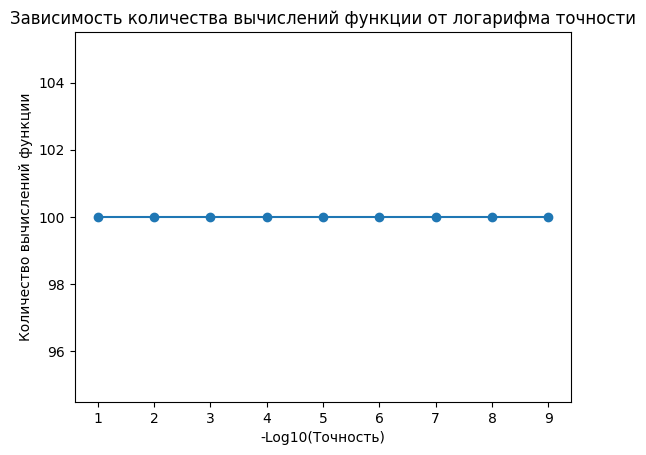

In [72]:
def newton_method(initial_guess, tolerance, a, b):
    x = initial_guess
    iteration = 0
    data = []

    start_time = time.time()

    while abs(derivative(x)) > tolerance and interval[0] <= x <= interval[1]:
        f_x = f(x)
        data.append([iteration, x, f_x, interval[0], interval[1]])

        x = x - f_x / derivative(x)
        iteration += 1

    end_time = time.time()
    exec_time = end_time - start_time

    if x < interval[0]:
        x = interval[0]
    elif x > interval[1]:
        x = interval[1]

    final_interval = interval[1] - interval[0]

    return x, f(x), final_interval, iteration, exec_time, data

initial_guess = 50
interval = (0, 100)
tolerance = 0.001

minx, minf, _, iters, exec_time, data = newton_method(initial_guess, tolerance, 0, 100)

interval_length = (interval[1] - interval[0]) / 2**iters
add_values(minf, minx, iters, exec_time, interval_length)
print(f"Метод Ньютона: Минимальное значение функции - {minf}, значение x - {minx}, "
      f"число итераций - {iters}, время выполнения - {exec_time:.6f} секунд, "
      f"длина конечного отрезка - {interval_length}")

print("\nТаблица результатов:")
print("Итерация\tX\t\t\tF(X)\t\t\tНачало интервала\tКонец интервала")

for row in data:
    print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4]:.6f}")


iterations_list1 = [newton_method(initial_guess, 0, 100, tol)[2] for tol in tolerances]
plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
plt.xlabel('-Log10(Точность)')
plt.ylabel('Количество вычислений функции')
plt.title('Зависимость количества вычислений функции от логарифма точности')
plt.show()

In [73]:
df = pd.DataFrame({'Метод': ['Метод половинного деления', 'Метод золотого сечения', 'Метод Фибоначчи', 'Метод Ньютона'], 'Минимальное значение f(x)': minf_list, 'min(x)': minx_list, 'Число итераций': iter_list, 'Время выполнения': exec_list, 'Длина конечного отрезка': final_interval_list})
df.to_excel('Методы.xlsx', index=False)
df

,Метод,Минимальное значение f(x),min(x),Число итераций,Время выполнения,Длина конечного отрезка
0,Метод половинного деления,-0.964599,97.656250,17,0.001505,7.629395e-04
1,Метод золотого сечения,-1.000000,47.123669,17,0.000000,9.632154e-04
2,Метод Фибоначчи,-1.000000,47.123457,21,0.000000,4.085635e-03
3,Метод Ньютона,1.000000,0.000000,51,0.001509,4.440892e-14
